In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python-headless deepface

(np.float64(-0.5), np.float64(639.5), np.float64(359.5), np.float64(-0.5))

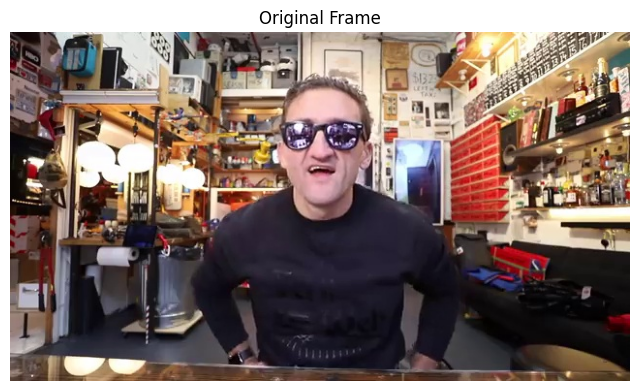

In [21]:

# 1. Imports and Configuration
import pandas as pd
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from deepface import DeepFace

# Load pretrained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


# 2. Specify Your Frame Path
# Replace the string below with the path to your frame image
FRAME_PATH = Path("/content/-B4wmuJ-qSs_frame9982.jpg")

# %%
# 3. Load and Display the Original Frame
image = cv2.imread(str(FRAME_PATH))
if image is None:
    raise FileNotFoundError(f"Frame not found at {FRAME_PATH}")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(image_rgb)
plt.title('Original Frame')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(359.5), np.float64(-0.5))

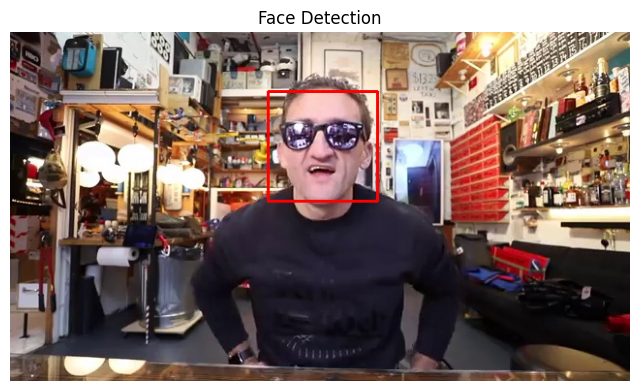

In [22]:
# 4. Face Detection and Bounding Box Overlay
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles on a copy
overlay = image_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(overlay, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(8,6))
plt.imshow(overlay)
plt.title('Face Detection')
plt.axis('off')

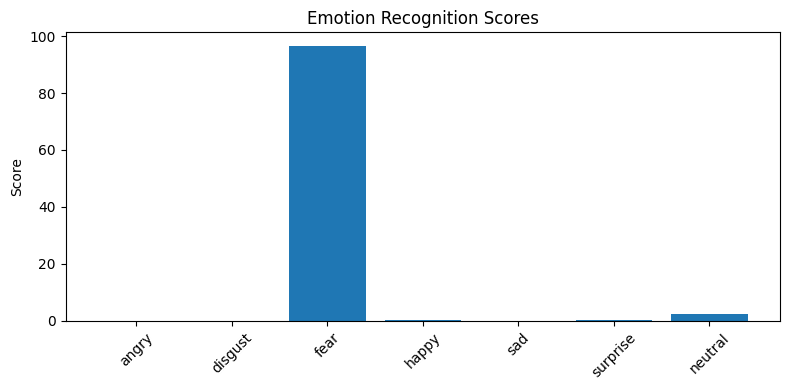

In [23]:
# 5. Emotion Recognition and Visualization
# Analyze emotions on the provided frame
df_analysis = DeepFace.analyze(img_path=str(FRAME_PATH), actions=['emotion'], enforce_detection=False)
emotion_scores = df_analysis[0]['emotion']

# Bar chart of emotion scores
emotions = list(emotion_scores.keys())
scores = list(emotion_scores.values())
plt.figure(figsize=(8,4))
plt.bar(emotions, scores)
plt.ylabel('Score')
plt.title('Emotion Recognition Scores')
plt.xticks(rotation=45)
plt.tight_layout()


Brightness: 97.71
Blurriness: 1518.71
Mean R,G,B: (112.3, 92.6, 85.7)


(np.float64(-0.5), np.float64(639.5), np.float64(359.5), np.float64(-0.5))

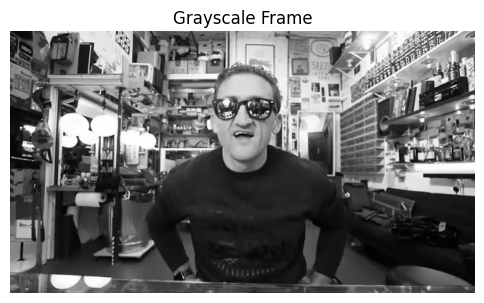

In [24]:
# 6. Intermediate Visual Features
# Brightness
brightness = gray.mean()
# Blurriness (variance of Laplacian)
blurriness = cv2.Laplacian(gray, cv2.CV_64F).var()
# Mean color channels
mean_r = image[:, :, 2].mean()
mean_g = image[:, :, 1].mean()
mean_b = image[:, :, 0].mean()

print(f"Brightness: {brightness:.2f}")
print(f"Blurriness: {blurriness:.2f}")
print(f"Mean R,G,B: ({mean_r:.1f}, {mean_g:.1f}, {mean_b:.1f})")

# Display Grayscale Image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Frame')
plt.axis('off')